In [72]:
#####COMPILER


#Import Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
from IPython.core.display import HTML 
import matplotlib.pyplot as plt
from matplotlib import offsetbox
%matplotlib inline
import os
#import tensorflow as tf

import os
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)
from sklearn.model_selection import train_test_split

from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from time import time
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
from scipy.stats import spearmanr
#from geopy.distance import geodesic
from sklearn.neighbors import kneighbors_graph
from sklearn.manifold import Isomap
from scipy.spatial import procrustes

from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
from scipy.stats import spearmanr
#from geopy.distance import geodesic
from sklearn.neighbors import kneighbors_graph
from sklearn.manifold import Isomap
from scipy.spatial import procrustes
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import pickle
from time import time
import importlib
import functions
importlib.reload(functions)
from functions import *

In [54]:
# IEEE Format for Figures
from matplotlib import rc
font = {'family' : 'times new roman',
        'weight' : 400,
        'size'   : 19}

plt.rc('font', **font)

# Toys Exemple

In this section you can play with two toys datset.
   1. Generate toy dataset
   2. Plot spearman's Rho, Residual Variance and get best and worst embedding
   3. Plot embedding PCA like
   4. Check Robustness model with variation of number of datapoints


Swiss Roll with :  1000  Datapoint


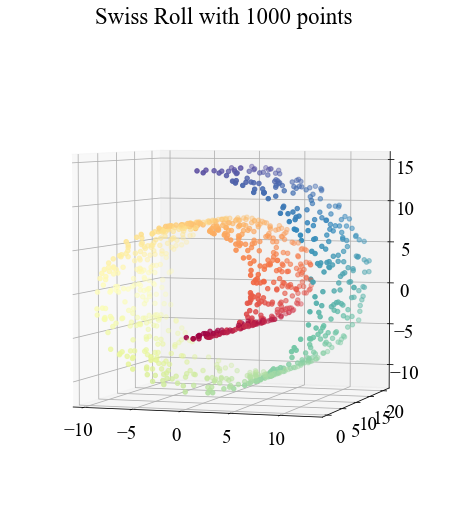

In [66]:
# Creat Dataset.
# Choose number of point and type of dataset. 
# String = {s_curve or swiss}
X,color = creat_s_curve(1000,"swiss")

Embedding with K_max =  8
Embedding with K_min =  4
K = 8 Produce the biggest Spearson's Rho:  0.7812310556511983 for LLE
K = 4 Produce the smallest Spearson's Rho:  0.04191401053595554 for LLE
Embedding with K_max =  8
Embedding with K_min =  17
K = 8 Produce the biggest Spearson's Rho:  0.8759076771331692 for MLLE
K = 17 Produce the smallest Spearson's Rho:  0.2936633382789815 for MLLE


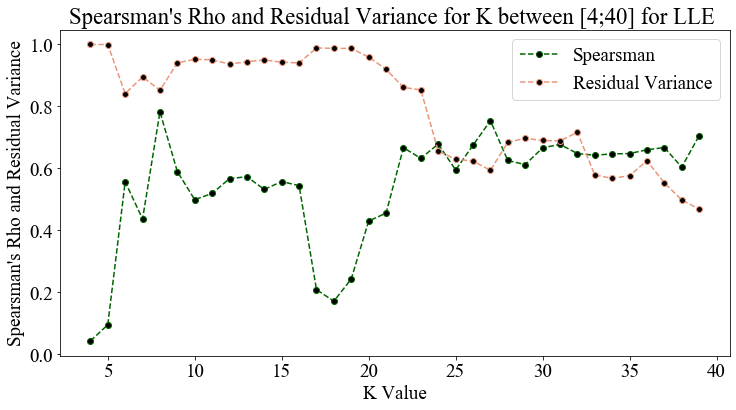

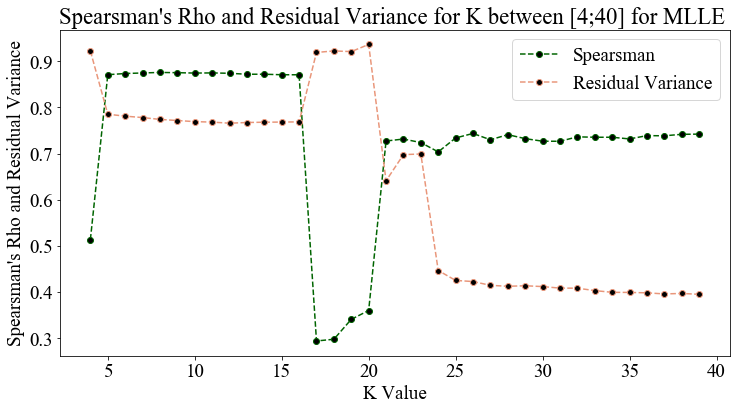

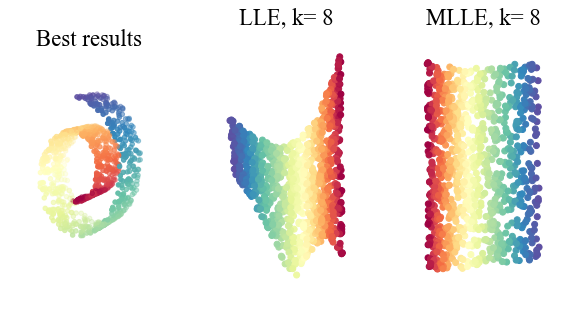

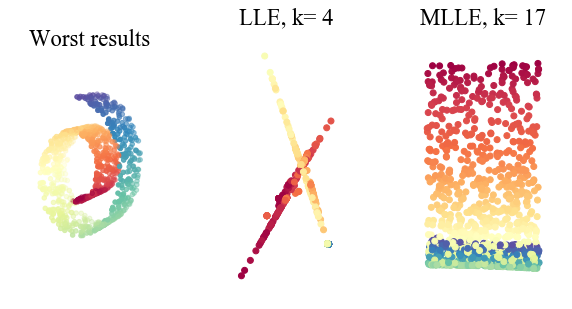

In [69]:
Dim       = 2
Max_k     = 40 # Will will test k between 4 and 40

LLE_best,LLE_worst,liste_error_LLE,K_maxLLE,K_minLLE = Spearsman_s_Rho_graph (X,Max_k,Dim,'LLE')
MLLE_best,MLLE_worst,liste_error_MLLE,K_maxMLLE,K_minMLLE = Spearsman_s_Rho_graph (X,Max_k,Dim,'MLLE')

#LLE, MLLE,LLE_eror,MLLE_eror = LLE_MLLE(X,7,2)
creat_graph(X,LLE_best,MLLE_best,color,K_maxLLE,K_maxMLLE, "Best")
creat_graph(X,LLE_worst,MLLE_worst,color,K_minLLE,K_minMLLE, "Worst")

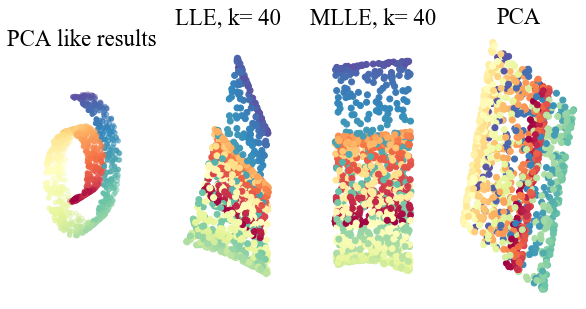

In [70]:
# Creat Weak embedding similar to PCA
k = 40 
dim = 2
LLE,MLLE,LLE_error,MLLE_error = LLE_MLLE(X,k,dim)
creat_graph2(X,LLE,MLLE,color,k,k,"PCA like")

S_curve with  200 datapoints
Embedding with K_max =  7
Embedding with K_min =  4
K = 7 Produce the biggest Spearson's Rho:  0.8477651889438771 for MLLE
K = 4 Produce the smallest Spearson's Rho:  0.29862539804576366 for MLLE
S_curve with  400 datapoints
Embedding with K_max =  7
Embedding with K_min =  4
K = 7 Produce the biggest Spearson's Rho:  0.8394864232477055 for MLLE
K = 4 Produce the smallest Spearson's Rho:  0.4858301932911492 for MLLE
S_curve with  1000 datapoints
Embedding with K_max =  8
Embedding with K_min =  4
K = 8 Produce the biggest Spearson's Rho:  0.8456374349551071 for MLLE
K = 4 Produce the smallest Spearson's Rho:  0.5548668602922968 for MLLE
S_curve with  2000 datapoints
Embedding with K_max =  13
Embedding with K_min =  4
K = 13 Produce the biggest Spearson's Rho:  0.8456790267214384 for MLLE
K = 4 Produce the smallest Spearson's Rho:  0.40910963691799535 for MLLE


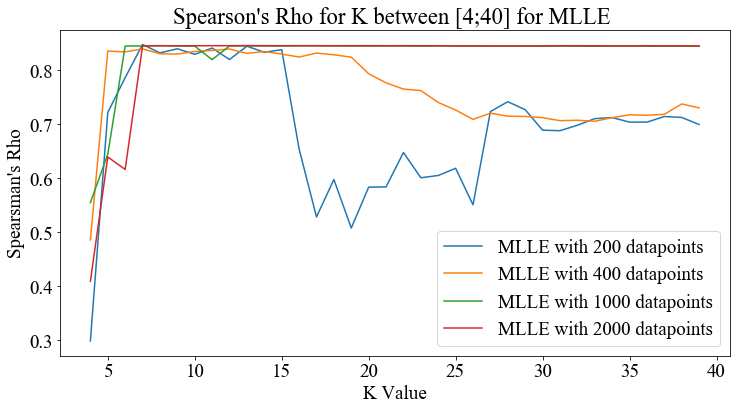

In [71]:
# Performance MLLE With increase of data point

n_neighbors = 40 # Will test k between 4 and 40
dimension   = 2
Size_data   = [200,400,1000,2000]  

plt.figure(figsize=(12, 6))
for i in Size_data:
    print("S_curve with ",i,"datapoints")
    Y,color = datasets.make_s_curve(n_samples=i)
    MLLE_best,MLLE_worst,liste_error_MLLE,SpearsmanMLLE = Spearsman_s_Rho_graph2 (Y,n_neighbors,dimension,'MLLE')
    plt.plot(range(4,n_neighbors), SpearsmanMLLE,label="MLLE with %i datapoints"%(i))

plt.title("Spearson's Rho for K between [4;%i] for MLLE "% (n_neighbors))
plt.xlabel('K Value')
plt.ylabel("Spearsman's Rho")
plt.legend()

S_curve with  200 datapoints
Embedding with K_max =  8
Embedding with K_min =  4
K = 8 Produce the biggest Spearson's Rho:  0.8269396930676811 for LLE
K = 4 Produce the smallest Spearson's Rho:  0.40640525762113355 for LLE
S_curve with  400 datapoints
Embedding with K_max =  11
Embedding with K_min =  4
K = 11 Produce the biggest Spearson's Rho:  0.7976214952184693 for LLE
K = 4 Produce the smallest Spearson's Rho:  0.3978738891366996 for LLE
S_curve with  1000 datapoints
Embedding with K_max =  10
Embedding with K_min =  5
K = 10 Produce the biggest Spearson's Rho:  0.8099219046994591 for LLE
K = 5 Produce the smallest Spearson's Rho:  0.27361877689050035 for LLE
S_curve with  2000 datapoints
Embedding with K_max =  27
Embedding with K_min =  5
K = 27 Produce the biggest Spearson's Rho:  0.8622949732320958 for LLE
K = 5 Produce the smallest Spearson's Rho:  0.290960062250628 for LLE


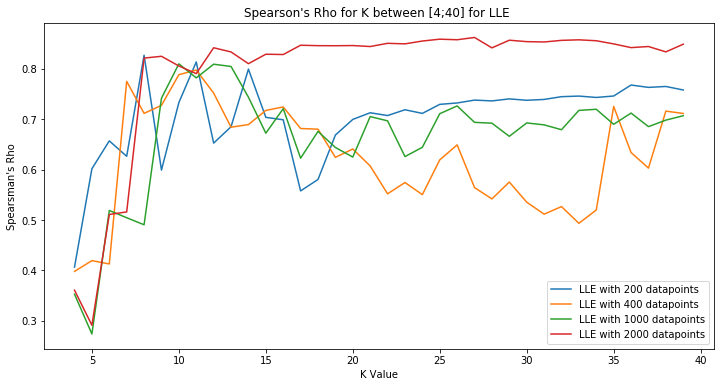

In [35]:
plt.figure(figsize=(12, 6))

n_neighbors = 40 # Will test k between 4 and 40
dimension   = 2
Size_data   = [200,400,1000,2000]  

for i in Size_data:
    print("S_curve with ",i,"datapoints")
    Y,color = datasets.make_s_curve(n_samples=i)
    LLE_best,LLE_worst,liste_error_LLE,SpearsmanLLE = Spearsman_s_Rho_graph2 (Y,n_neighbors,dimension,'LLE')
    plt.plot(range(4,n_neighbors), SpearsmanLLE,label="LLE with %i datapoints"%(i))

plt.title("Spearson's Rho for K between [4;%i] for LLE "% (n_neighbors))
plt.xlabel('K Value')
plt.ylabel("Spearsman's Rho")
plt.legend()

# Fashion MNIST

In this section you can experiment LLE and MLLE on fashion MNIST Data set.
   
   1. Play with parameter such as: k, d, number of class, number of element, training/testing ration
   2. Augmentation of data: Rotation, Intensity and Noise
   3. Plot embedding 
   4. Classification capability
   5. Classification capability in function of d
   5. Topology preservation (2h45min)

### All the cell that contain the comment ##Compile need to be compile to get a result

In [39]:
### compile ###

#parameters that can be tune
# Classes : Which class to compute
# max_K  : Do any comparison criteria for K in [4,max_K] 
classes = [0,1,2,3,4,5,6,7,8,9]
max_K = 40
K = 22
d = 2
#n = 10 # Number element of a class
test_split = 0.2

In [40]:
#### compile ###
#load dataset
"""To get the biggest dataset compile second load. (Not recommended for a Quick check)"""
df_origin = pd.read_csv('fashion-mnist_test.csv')
#df_origin = pd.read_csv('fashion-mnist_train.csv') # Big Dataset
df_class  = multiclass(classes, df_origin)
#df_class  =number_element_from(n,df_class) # To get a specific number of element in a group of class
df_labels = df_class.iloc[1:, 0].astype(int)
df_images = df_class.iloc[1:, 1:]
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
         'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# Add rotation to the dataset
Number_of_rotation = 100
df_labels, df_images = im_rotation(df_class,Number_of_rotation)

In [ ]:
# Add Noise
"""
types:
gaussian -> gauss
salt & pepper -> sp
speckle -> spec
"""
df_images = noisy(df_images, "sp")

In [ ]:
# intensity multiplier
Multiplier = 10 
df_images = intensity(df_images, Multiplier)

In [41]:
### compile ###
#data normalization
X_train, X_dev, y_train, y_dev = train_test_split(df_images, df_labels, test_size=test_split)
X_train_standardized = StandardScaler().fit_transform(X_train)
X_dev_standardized = StandardScaler().fit_transform(X_dev)
X_train_normalized = Normalizer().fit_transform(X_train_standardized)
X_dev_normalized = Normalizer().fit_transform(X_dev_standardized)

In [56]:
### compile ###
#LLE Embedding
clf = manifold.LocallyLinearEmbedding(n_neighbors=K, n_components=d,
                                  method ='standard')
X_transformed_train = clf.fit_transform(X_train_normalized)
X_transformed_test  = clf.transform(X_dev_normalized)

In [57]:
### compile ###
#MLLE Embedding
clf_m = manifold.LocallyLinearEmbedding(n_neighbors=K, n_components=d,
                                  method ='modified')
X_transformed_train_m = clf_m.fit_transform(X_train_normalized)
X_transformed_test_m  = clf_m.transform(X_dev_normalized)

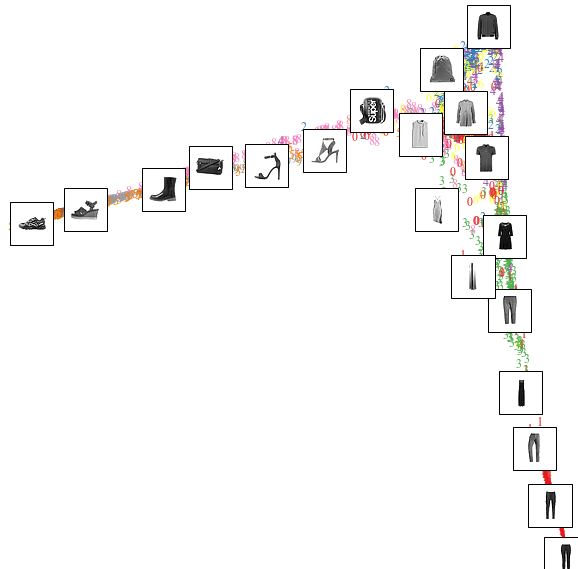

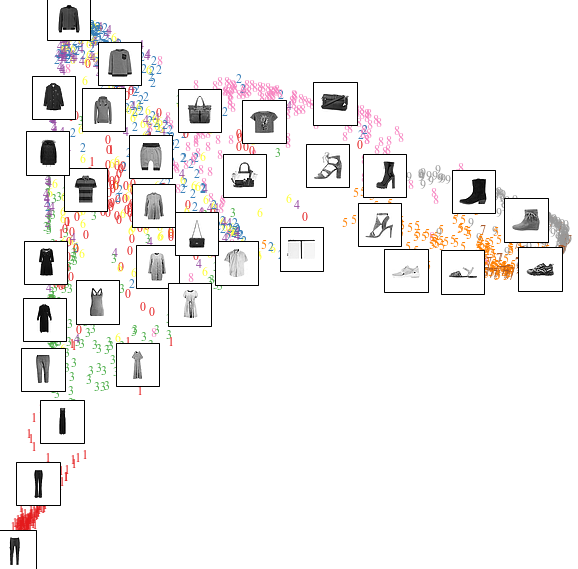

In [52]:
### compile ###
#plot LLE and MLLE
plot_embedding_v(X_transformed_test, X_dev,y_dev) 
plot_embedding_v(X_transformed_test_m, X_dev,y_dev)

time =  33.313212871551514
K = 10 give the best F1 score:  0.6842749827055582 for LLE
K = 29 give the best F1 score:  0.7173882629440255 for MLLE
Classification Rate = 0.17404306220095694 For LLE
Classification Rate = 0.1375598086124402 For MLLE


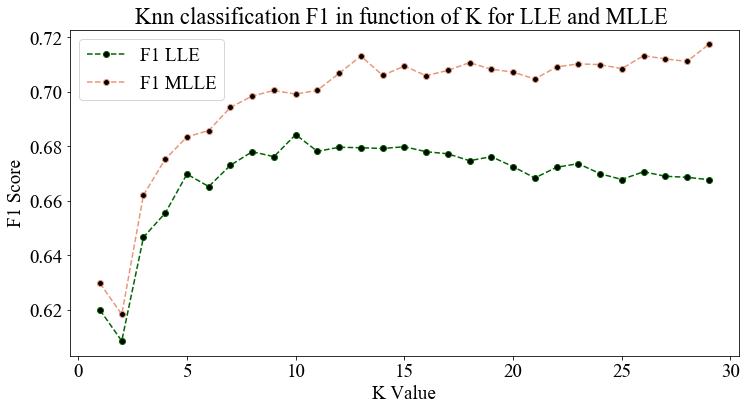

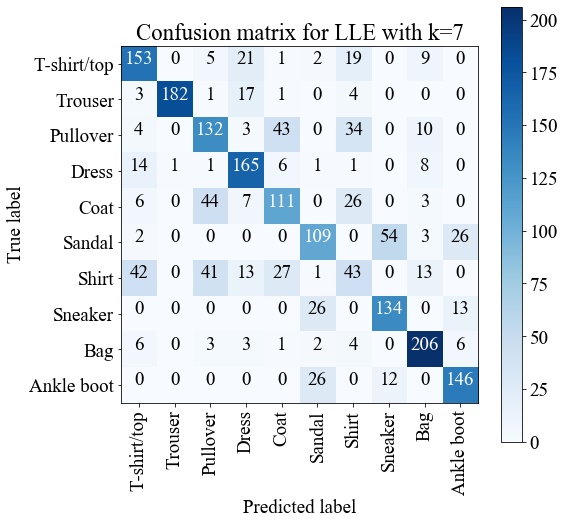

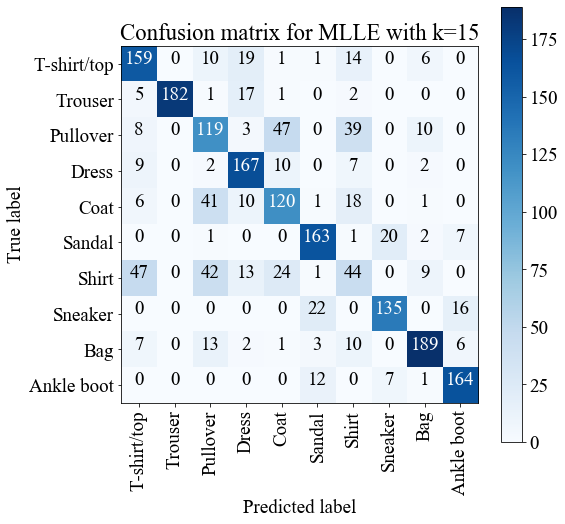

In [64]:
# This cell do Knn for k in [1,30] on LLE and MLLE embedding
# It helps to found best k for Knn
# String = true allow to do knn whithout embedding (Very very long long)

string = False

#KNN without Embedding
t0 = time()
knn_normal, y_pred_normal = KNN(X_train_normalized, X_dev_normalized, y_train, y_dev, 5)
print("time = ", time() - t0)

k_LLE,k_MLLE = graph_F1(string,X_transformed_train,X_transformed_test,y_train,y_dev,X_transformed_train_m,X_transformed_test_m)

# Ones you have you can proceed the real classification
knn_emb, y_pred_emb_LLE  = KNN(X_transformed_train, X_transformed_test, y_train, y_dev, k_LLE)
knn_emb, y_pred_emb_MLLE = KNN(X_transformed_train_m, X_transformed_test_m, y_train, y_dev, k_MLLE)

rate_LLE,knn_cm_embedding_LLE  = classification_rate (y_dev,y_pred_normal,y_pred_emb_LLE)
rate_MLLE,knn_cm_embedding_MLLE = classification_rate (y_dev,y_pred_normal,y_pred_emb_MLLE)
print("Classification Rate =", rate_LLE, "For LLE")
print("Classification Rate =", rate_MLLE, "For MLLE")



names = [labels[i] for i in classes] 
plot_confusion_matrix(knn_cm_embedding_LLE,names,"LLE with k=7")
plot_confusion_matrix(knn_cm_embedding_MLLE,names,"MLLE with k=15")

Embedding with K_max =  9
Embedding with K_min =  29
K = 9 Produce the biggest Spearson's Rho:  0.5007772729928656 for LLE
K = 29 Produce the smallest Spearson's Rho:  0.35256295144940336 for LLE
Embedding with K_max =  29
Embedding with K_min =  17
K = 29 Produce the biggest Spearson's Rho:  0.6599465141899616 for MLLE
K = 17 Produce the smallest Spearson's Rho:  0.48168466618072026 for MLLE


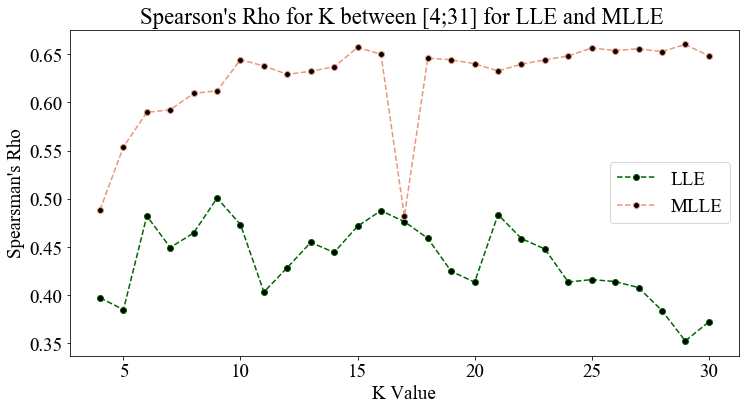

In [199]:
### Do spearsman's Rho on full dataset to get optimal k.
### 2h40 of compilation 
n_neighbors = 31 # Will test k between 4 and 30
dimension   = 2
LLE_best,LLE_worst,liste_error_LLE,SpearsmanLLE = Spearsman_s_Rho_graph3 (df_images,n_neighbors,dimension,'LLE')
MLLE_best,MLLE_worst,liste_error_MLLE,SpearsmanMLLE = Spearsman_s_Rho_graph3 (df_images,n_neighbors,dimension,'MLLE')

graph_spearsman_s (SpearsmanLLE,SpearsmanMLLE,n_neighbors)


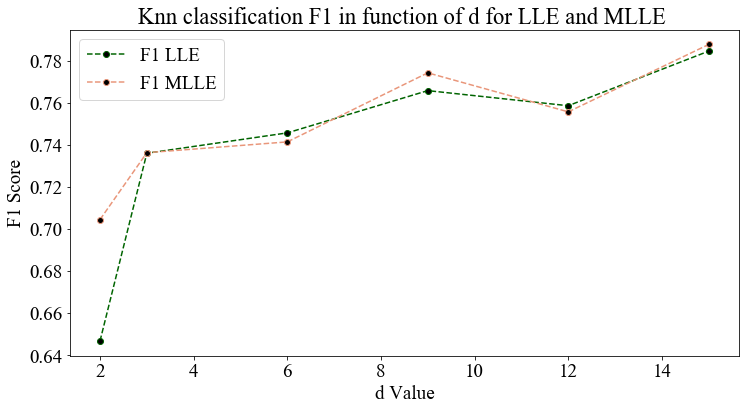

In [99]:
# Evolution classification with respect to d 
d_list = [2,3,6,9,12,15]
K=20
j = 0

matrix_LLE       = np.zeros((len(d_list),10))
matrix_MLLE      = np.zeros((len(d_list),10))

for d in d_list:
    f1_d_LLE = []
    f1_d_MLLE = []
    
    X_train, X_dev, y_train, y_dev = train_test_split(df_images, df_labels, test_size=test_split)
    X_train_standardized = StandardScaler().fit_transform(X_train)
    X_dev_standardized = StandardScaler().fit_transform(X_dev)
    X_train_normalized = Normalizer().fit_transform(X_train_standardized)
    X_dev_normalized = Normalizer().fit_transform(X_dev_standardized)
    
    #LLE
    clf = manifold.LocallyLinearEmbedding(n_neighbors=K, n_components=d,
                                      method ='standard')
    X_transformed_train = clf.fit_transform(X_train_normalized)
    X_transformed_test  = clf.transform(X_dev_normalized)


    #MLLE
    clf_m = manifold.LocallyLinearEmbedding(n_neighbors=K, n_components=d,
                                      method ='modified')
    X_transformed_train_m = clf_m.fit_transform(X_train_normalized)
    X_transformed_test_m  = clf_m.transform(X_dev_normalized)
    
    for i in range(10):
        
        # For LLE
        knn_emb, y_pred_emb_LLE = KNN(X_transformed_train, X_transformed_test, y_train, y_dev, 15)
        f1_d_LLE.append(metrics.f1_score( y_dev,  y_pred_emb_LLE, average= "weighted"))
       
        # For MLLE
        knn_emb, y_pred_emb_MLLE = KNN(X_transformed_train_m, X_transformed_test_m, y_train, y_dev, 15)
        f1_d_MLLE.append(metrics.f1_score( y_dev, y_pred_emb_MLLE, average= "weighted"))
     
    
    matrix_LLE[j,:] = f1_d_LLE
    matrix_MLLE[j,:]= f1_d_MLLE
    j = j + 1

mean_LLE        = matrix_LLE.mean(axis=1) 
mean_MLLE       = matrix_MLLE.mean(axis=1)    
std_LLE         = np.std(matrix_LLE, axis = 1)
std_MLLE        = np.std(matrix_MLLE, axis = 1)
    
plt.figure(figsize=(12, 6))
plt.plot(d_list, mean_LLE, color='darkgreen', linestyle='dashed', marker='o',markerfacecolor='black', markersize=6,label="F1 LLE")

plt.plot(d_list, mean_MLLE, color='darksalmon', linestyle='dashed', marker='o',
             markerfacecolor='black', markersize=6,label="F1 MLLE")

plt.title("Knn classification F1 in function of d for LLE and MLLE ")
plt.xlabel('d Value')
plt.ylabel("F1 Score")
plt.legend()


# CNN

In this section we discuss about the Classification performance with a Convolutional Neural Network

In [3]:
#Preparation
num_classes = 10
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:,1:]/255
y_train = train_data[:,0]
x_test= test_data[:,1:]/255
y_test=test_data[:,0]
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

In [5]:
### without embedding ###

#Shape data properly
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 
x_train_ = x_train.reshape(x_train.shape[0],*image_shape)
x_test_ = x_test.reshape(x_test.shape[0],*image_shape)
x_validate_ = x_validate.reshape(x_validate.shape[0],*image_shape)

#Create model
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

#Train model
history = cnn_model.fit(
    x_train_,
    y_train,
    batch_size=4096,
    epochs=100,
    verbose=1,
    validation_data=(x_validate_,y_validate),
)

#Test and print classification report
predicted_classes = cnn_model.predict_classes(x_test_)
y_true = test_df.iloc[:, 0]
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 9s 188us/step - loss: 1.7626 - accuracy: 0.4416 - val_loss: 1.1776 - val_accuracy: 0.6475
Epoch 2/2
48000/48000 [==============================] - 9s 189us/step - loss: 0.9231 - accuracy: 0.7098 - val_loss: 0.7106 - val_accuracy: 0.7623
              precision    recall  f1-score   support

     Class 0       0.72      0.80      0.76      1000
     Class 1       0.94      0.89      0.92      1000
     Class 2       0.68      0.61      0.65      1000
     Class 3       0.71      0.85      0.77      1000
     Class 4       0.56      0.72      0.63      1000
     Class 5       0.89      0.81      0.85      1000
     Class 6       0.53      0.28      0.37      1000
     Class 7       0.79      0.84      0.81      1000
     Class 8       0.92      0.93      0.93      1000
     Class 9       0.87      0.92      0.89      1000

    accuracy                           0.77     10000
   mac

In [ ]:
### LLE ###

#Embedding
time0 = time()
clf = manifold.LocallyLinearEmbedding(n_neighbors=22, n_components=14,
                                  method ='standard')
X_transformed_train = clf.fit_transform(x_train)
X_transformed_validate = clf.transform(x_validate)
X_transformed_test  = clf.transform(x_test)
time = time()-time0

#Shape data properly
image_rows = 1
image_cols = 14
batch_size = 4096
image_shape = (image_rows,image_cols,1) 
x_train_ = X_transformed_train.reshape(X_transformed_train.shape[0],*image_shape)
x_test_ = X_transformed_test.reshape(X_transformed_test.shape[0],*image_shape)
x_validate_ = X_transformed_validate.reshape(X_transformed_validate.shape[0],*image_shape)

#Create model
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=1,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

#Train model
history = cnn_model.fit(
    x_train_,
    y_train,
    batch_size=4096,
    epochs=100,
    verbose=1,
    validation_data=(x_validate_,y_validate),
)

#Test and print classification report
predicted_classes = cnn_model.predict_classes(x_test_)
y_true = test_df.iloc[:, 0]
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

In [ ]:
### MLLE ###

#Embedding
time0 = time()
clf = manifold.LocallyLinearEmbedding(n_neighbors=22, n_components=14,
                                  method ='modified')
X_transformed_train = clf.fit_transform(x_train)
X_transformed_validate = clf.transform(x_validate)
X_transformed_test  = clf.transform(x_test)
time = time()-time0

#Shape data properly
image_rows = 1
image_cols = 14
batch_size = 4096
image_shape = (image_rows,image_cols,1) 
x_train_ = X_transformed_train.reshape(X_transformed_train.shape[0],*image_shape)
x_test_ = X_transformed_test.reshape(X_transformed_test.shape[0],*image_shape)
x_validate_ = X_transformed_validate.reshape(X_transformed_validate.shape[0],*image_shape)

#Create model
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=1,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

#Train model
history = cnn_model.fit(
    x_train_,
    y_train,
    batch_size=4096,
    epochs=100,
    verbose=1,
    validation_data=(x_validate_,y_validate),
)

#Test and print classification report
predicted_classes = cnn_model.predict_classes(x_test_)
y_true = test_df.iloc[:, 0]
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

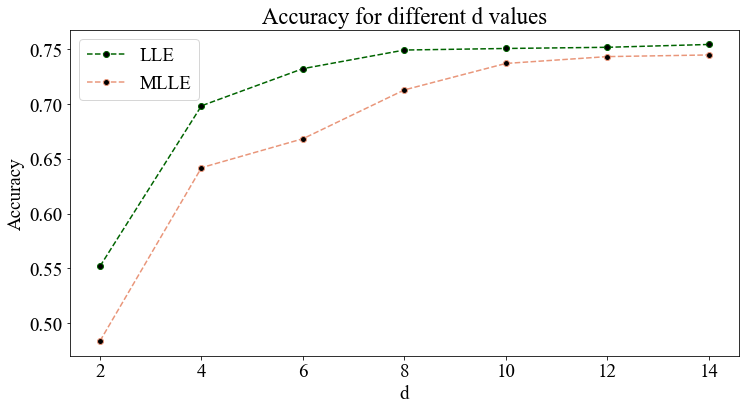

In [7]:
ds = [2,4,6,8,10,12,14]
aLLE = pickle.load(open('aLLE.sav', 'rb'))
aMLLE = pickle.load(open('aMLLE.sav', 'rb'))

font = {'family' : 'times new roman',
        'weight' : 400,
        'size'   : 19}

plt.rc('font', **font)

plt.figure(figsize=(12, 6))
plt.plot(ds, aLLE, color='darkgreen', linestyle='dashed', marker='o',markerfacecolor='black', markersize=6,label="LLE")

plt.plot(ds, aMLLE, color='darksalmon', linestyle='dashed', marker='o',
             markerfacecolor='black', markersize=6,label="MLLE")

plt.title("Accuracy for different d values")
plt.xlabel('d')
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("accD.png", 
            #This is simple recomendation for publication plots
            dpi=1000, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
            )
plt.show()